<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](https://media.licdn.com/dms/image/C560BAQGt_i7kDfJ1Sg/company-logo_200_200/0/1624812877012?e=1682553600&v=beta&t=kRNhTWBDTghUKz-6kWXjz5enuFdkkiWO4vdXBs_F17U) | <h1><font size="+7">Machine Learning in Practice</font></h1> 
---

<center>
    <h1><font color="blue">Explainable AI</font></h1>
</center>

In [ ]:
#@title format setting
%%html
<!DOCTYPE html>
<html lang="en">
  <head> </head>
  <body>
<script src="https://bot.voiceatlas.mysmce.com/v1/chatlas.js"></script>
<app-chatlas
	atlas-id="f759a188-f8bb-46bb-9046-3b1b961bd6aa"
	widget-background-color="#3f51b5ff"
	widget-text-color="#ffffffff"
	widget-title="Chatlas">
</app-chatlas>
  </body>
</html>

# <font color="blue">Scikit-Learn</font>

- Scikit-learn is a free machine learning library for Python. 
- Provides a selection of efficient tools for machine learning and statistical modeling including: 
     - **Classification:** Identifying which category an object belongs to. Example: Spam detection
     - **Regression:** Predicting a continuous variable based on relevant independent variables. Example: Stock price predictions
     - **Clustering:** Automatic grouping of similar objects into different clusters. Example: Customer segmentation 
     - **Dimensionality Reduction:** Seek to reduce the number of input variables in training data by preserving the salient relationships in the data
- Features various algorithms like support vector machine, random forests, and k-neighbours.
- Supports Python numerical and scientific libraries like NumPy and SciPy.

Some popular groups of models provided by scikit-learn include:

- **Clustering:** Group unlabeled data such as KMeans.
- **Cross Validation:** Estimate the performance of supervised models on unseen data.
- **Datasets:** for test datasets and for generating datasets with specific properties for investigating model behavior.
- **Dimensionality Reduction:** Reduce the number of attributes in data for summarization, visualization and feature selection such as Principal component analysis.
- **Ensemble Methods:** Combine the predictions of multiple supervised models.
- **Feature Extraction:** Define attributes in image and text data.
- **Feature Selection:** Identify meaningful attributes from which to create supervised models.
- **Parameter Tuning:** Get the most out of supervised models.
- **Manifold Learning:** Summarize and depicting complex multi-dimensional data.
- **Supervised Models:** A vast array not limited to generalized linear models, discriminate analysis, naive bayes, lazy methods, neural networks, support vector machines and decision trees.
- **Unsupervised Learning Algorithms:** − They include clustering, factor analysis, PCA (Principal Component Analysis), unsupervised neural networks.


![fig_sckl](https://ulhpc-tutorials.readthedocs.io/en/latest/python/advanced/scikit-learn/images/scikit.png)
Image Source: ulhpc-tutorials.readthedocs.io

## Package Requirements

- Numpy
- scipy
- matplotlib
- pandas
- scikit-learn
- seaborn
- shap

# <font color="blue">Explainable AI with SHAP</font>
- SHAP is a Model-agnostic, post-hoc method. It is a local interpretation method, but we could apply it to all the data to get a global understanding. 
- It is based on the cooperative game theory which uses Shapley Additive Value( named in honour of Lloyd Shapley, 1951) to allocate the unequal contributions of all the players in a team. It belongs to the class of additive feature attribution methods. 

- Additive feature attribution means a marginal contribution of each feature. It basically compares the differences with and without that player/feature.

# <font color="blue">Explainable AI with SHAP — Income Prediction Example</font>

- In recent years, Explainable AI(XAI) or Interpretable machine learning has attracted increasing attention since higher accuracy without an understanding of the mechanism cause trust issue. For example, patients will question why they are diagnosed with a disease by a data-driven model. At least, interpretation helps validate the model.

- Despite its importance, the field is underspecified. Therefore, researchers like Lipton[1] tried to define the problem and discuss different approaches to solve it. This post will give a brief introduction to the terminologies/classification of XAI and explore one of the most popular methods SHAP (SHapley Additive exPlanations) through a simple income classification problem.


![fig_sckl](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*XhJ36ndu1ApjFvlg.jpeg)
Image Source: Medium



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#@title install packages
%matplotlib inline 
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
#!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 8.1 MB/s eta 0:00:00


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[683]	valid_0's binary_logloss: 0.277144


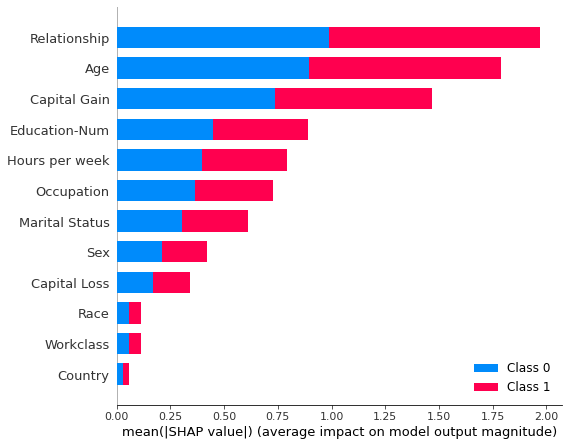

In [ ]:
#@title Explainable AI
shap.initjs()
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)
# create a simple model
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}
model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)
# explain the model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
# visualize the impact of each features
shap.summary_plot(shap_values, X)


# <font color="blue">Explaining Prediction Model</font>
This dataset consists of 506 neighboorhood regions around Boston in 1978, where our goal is to predict the median home price (in thousands) in each neighboorhood from 14 different features:

- CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town

- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000’s 

In [ ]:
import shap
import sklearn
# a classic housing price dataset
X,y = shap.datasets.boston()
X100 = shap.utils.sample(X, 100)

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

# <font color="blue">Examining the model coefficients</font>

The most common way of understanding a linear model is to examine the coefficients learned for each feature. These coefficients tell us how much the model output changes when we change each of the input features:

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

CRIM = -0.108
ZN = 0.0464
INDUS = 0.0206
CHAS = 2.6867
NOX = -17.7666
RM = 3.8099
AGE = 0.0007
DIS = -1.4756
RAD = 0.306
TAX = -0.0123
PTRATIO = -0.9527
B = 0.0093
LSTAT = -0.5248


While coefficents are great for telling us what will happen when we change the value of an input feature, by themselves they are not a great way to measure the overall importance of a feature. This is because the value of each coeffient depends on the scale of the input features. 

If for example we were to measure the age of a home in minutes instead of years, then the coeffiect for the AGE feature would become 0.0007∗365∗24∗60=367.92
. Clearly the number of minutes since a house was built is not more important than the number of years, yet it’s coeffiecent value is much larger. This means that the magnitude of a coeffient is not nessecarily a good measure of a feature’s importance in a linear model.

### A more complete picture using partial dependence plots

To understand a feature’s importance in a model it is necessary to understand both how changing that feature impacts the model’s output, and also the distribution of that feature’s values. To visualize this for a linear model we can build a classical partial dependence plot and show the distribution of feature values as a histogram on the x-axis:

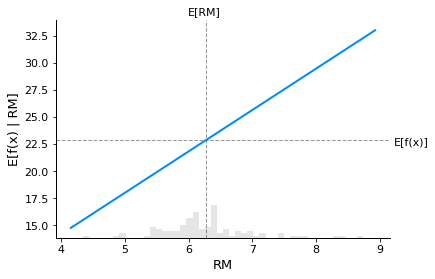

In [ ]:
shap.plots.partial_dependence("RM", model.predict, X100, ice=False, model_expected_value=True, feature_expected_value=True)

The gray horizontal line in the plot above represents the expected value of the model when applied to the boston housing dataset. The vertical gray line represents the average value of the AGE feature. Note that the blue partial dependence plot line (which the is average value of the model output when we fix the AGE feature to a given value) always passes through the interesection of the two gray expected value lines. We can consider this intersection point as the “center” of the partial dependence plot with respect to the data distribution. The impact of this centering will become clear when we turn to Shapley values next.

In [ ]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(X, max_samples=1000)
explainer = shap.Explainer(model.predict, background)
shap_values = explainer(X)

Permutation explainer: 507it [01:05,  7.38it/s]


In [ ]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(X, max_samples=1000)
explainer = shap.Explainer(model.predict, background)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "RM", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:],
    shap_value_features=X.iloc[sample_ind:sample_ind+1,:]
)


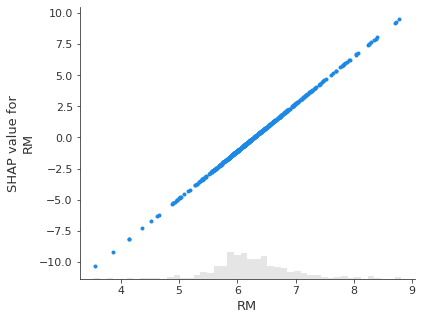

In [ ]:
shap.plots.scatter(shap_values[:,"RM"])

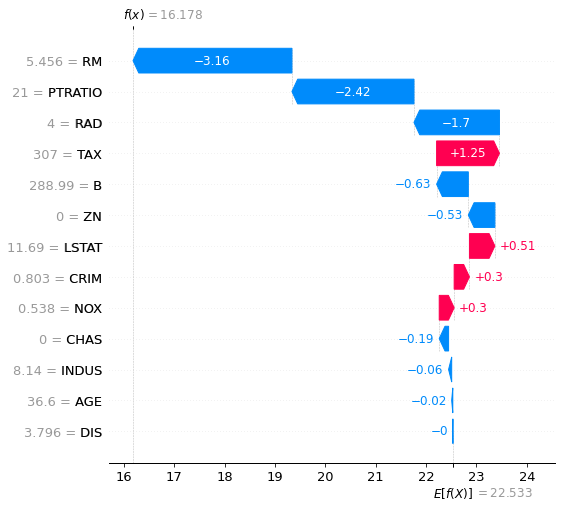

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

This results in the well-known class of generalized additive models (GAMs). While there are many ways to train these types of models (like setting an XGBoost model to depth-1), we will use InterpretMLs explainable boosting machines that are specifically designed for this.

In [ ]:
# fit a GAM model to the data
#!pip install interpret
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, background)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "RM", model_ebm.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:],
    shap_value_features=X.iloc[sample_ind:sample_ind+1,:]
)

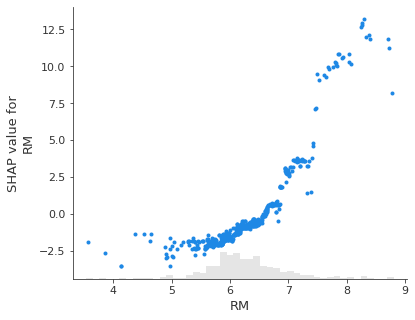

In [ ]:
shap.plots.scatter(shap_values_ebm[:,"RM"])

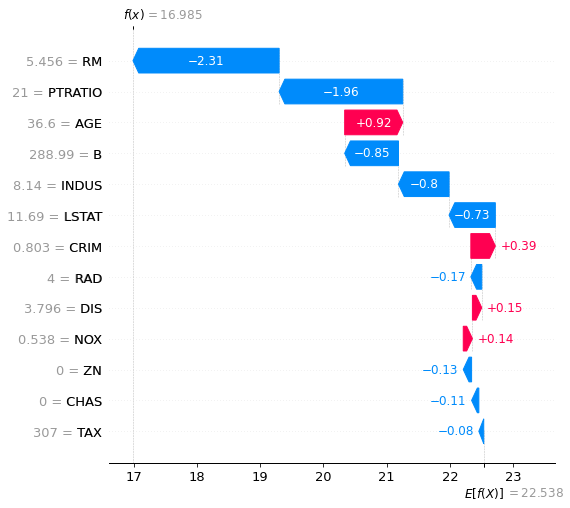

In [ ]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=14)

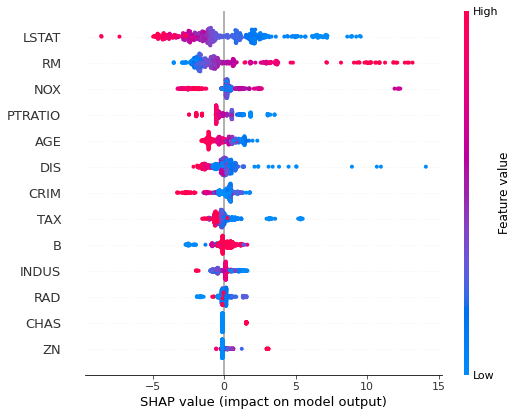

In [ ]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm, max_display=14)

# <font color="blue">Explaining a non-additive boosted tree model</font>

In [ ]:
# train XGBoost model
import xgboost
model_xgb = xgboost.XGBRegressor(nestimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, background)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "RM", model_xgb.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:],
    shap_value_features=X.iloc[sample_ind:sample_ind+1,:]
)

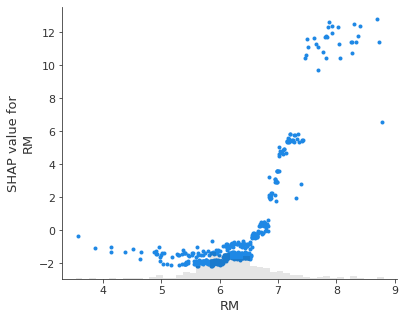

In [ ]:
shap.plots.scatter(shap_values_xgb[:,"RM"])

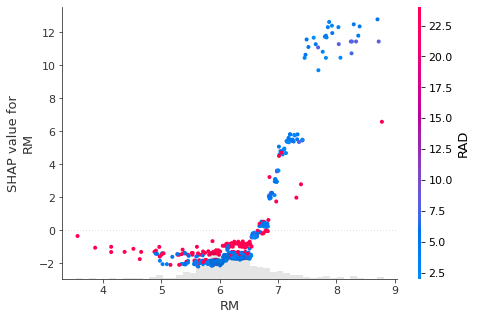

In [ ]:
shap.plots.scatter(shap_values_xgb[:,"RM"], color=shap_values)

# <font color="blue">Explaining a linear logistic regression model</font>

In [ ]:
#@title Explainable AI
# a classic adult census dataset price dataset
X_adult,y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)

def model_adult_proba(x):
    return model_adult.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:,1] - p[:,0]

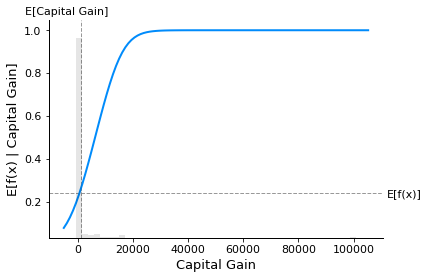

In [ ]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "Capital Gain", model_adult_proba, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)


In [ ]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X_adult, max_samples=1000)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X_adult[:1000])

Permutation explainer: 1001it [02:20,  6.73it/s]


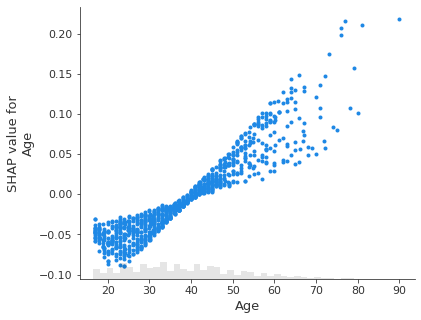

In [ ]:
shap.plots.scatter(shap_values_adult[:,"Age"])

# <font color="blue">Explaining an XGBoost logistic regression model</font>

In [ ]:
#@title Explainable AI
# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier(nestimators=100, max_depth=2).fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

 98%|===================| 32020/32561 [00:24<00:00]       

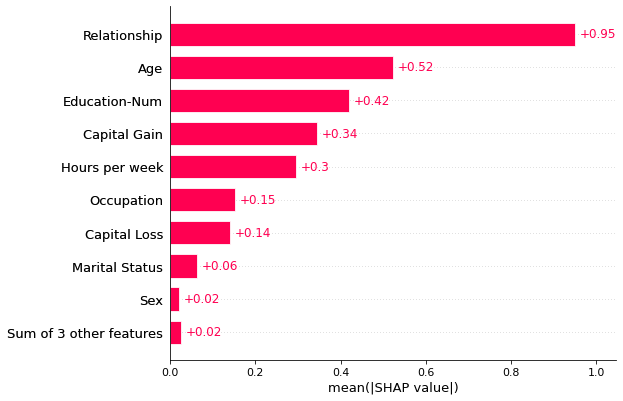

In [ ]:
shap.plots.bar(shap_values)

But the mean absolute value is not the only way to create a global measure of feature importance, we can use any number of transforms. Here we show how using the max absolute value highights the Capital Gain and Capital Loss features, since they have infrewuent but high magnitude effects.

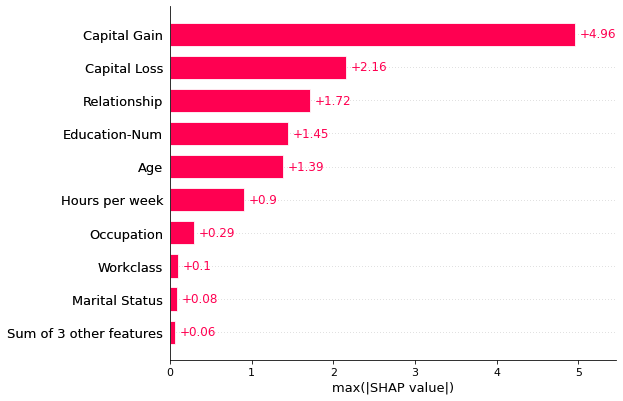

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

If we are willing to deal with a bit more complexity we can use a beeswarm plot to summarize the entire distribution of SHAP values for each feature.

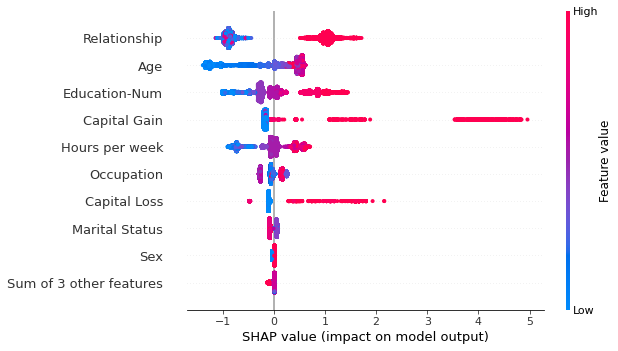

In [ ]:
shap.plots.beeswarm(shap_values)

By taking the absolute value and using a solid color we get a compromise between the complexity of the bar plot and the full beeswarm plot. Note that the bar plots above are just summary statistics from the values shown in the beeswarm plots below.

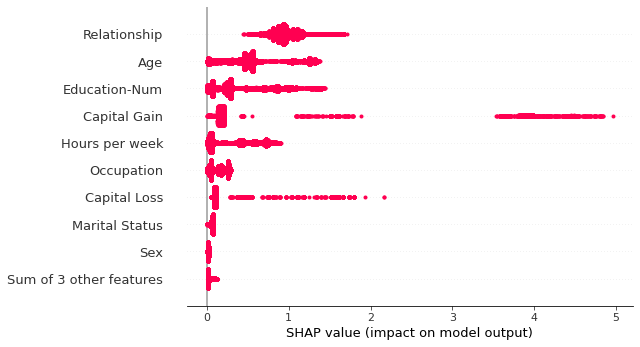

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

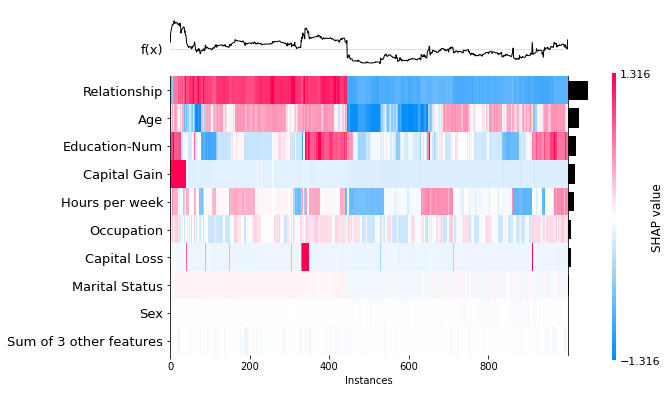

In [ ]:
shap.plots.heatmap(shap_values[:1000])

In [ ]:
shap.plots.scatter(shap_values[:,"Age"])

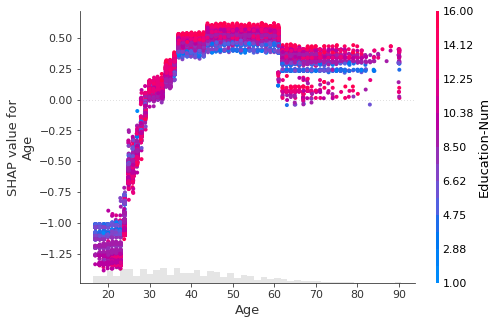

In [ ]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values[:,"Capital Gain"])

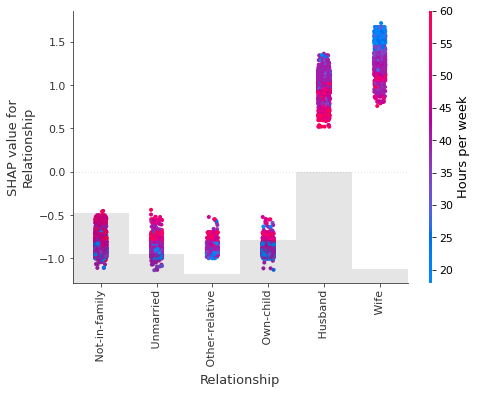

In [ ]:
shap.plots.scatter(shap_values[:,"Relationship"], color=shap_values)